In [347]:
import pandas as pd
from fairlearn.reductions import DemographicParity
from fairlearn.metrics import selection_rate

In [348]:
df = pd.read_csv('Challenge B Insider_Microsoft_issueDataset.csv') 

In [349]:
# Display data frame to see columns and data
# clean data if missing
# drop rows if data is missing or can aggregate if needed
# normalize the outliers for range

In [350]:
df.head()

Current Evaluation Model of Likelihood to Leave  EmployeeLeft  \
0                                             38.3           1.0   
1                                             38.0           1.0   
2                                             32.5           0.0   
3                                             36.5           0.0   
4                                             51.3           1.0   

   Hired through SMTP  Marked for PHT Program  Recruiting Location Code  \
0                   0                       1                     27999   
1                   0                       0                     81996   
2                   1                       1                     10000   
3                   1                       1                     10000   
4                   0                       0                     45998   

     Salary  Survey, Relative, Attitude toward Environment  \
0  41675.71                                              3   
1  45810.49                                              4   
2  51701.41                                              3   
3  40169.06                                              2   
4  55204.27                                              5   

   Survey, Relative, Attitude toward Peers  \
0                                        5   
1                                        3   
2                                        1   
3                                        8   
4                                        2   

   Survey, Relative, Peer's Average Attitude toward Peers  \
0                                                  7        
1                                                  1        
2                                                  1        
3                                                  4        
4                                                  1        

   Survey, Relative, Peer's Average Attitude toward Work/Life Balance  \
0                                                  5                    
1                                                  2                    
2                                                  3                    
3                                                  4                    
4                                                  4                    

                                         University  
0                               St. Norbert College  
1                               St. Norbert College  
2                               St. Norbert College  
3  Enugu State University of Science and Technology  
4                               St. Norbert College

In [351]:
#display the columns
df.columns

Index(['Current Evaluation Model of Likelihood to Leave', 'EmployeeLeft',
       'Hired through SMTP', 'Marked for PHT Program',
       'Recruiting Location Code', 'Salary',
       'Survey, Relative, Attitude toward Environment',
       'Survey, Relative, Attitude toward Peers',
       'Survey, Relative, Peer's Average Attitude toward Peers',
       'Survey, Relative, Peer's Average Attitude toward Work/Life Balance',
       'University'],
      dtype='object')

In [352]:
# do some statistical analysis on the data

In [353]:
df.mean()

Current Evaluation Model of Likelihood to Leave                          37.283764
EmployeeLeft                                                              0.439000
Hired through SMTP                                                        0.498571
Marked for PHT Program                                                    0.503357
Recruiting Location Code                                              52787.479929
Salary                                                                48850.571995
Survey, Relative, Attitude toward Environment                             3.760500
Survey, Relative, Attitude toward Peers                                   4.081143
Survey, Relative, Peer's Average Attitude toward Peers                    2.702429
Survey, Relative, Peer's Average Attitude toward Work/Life Balance        2.459571
dtype: float64

In [354]:
df.median()

Current Evaluation Model of Likelihood to Leave                          37.300
EmployeeLeft                                                              0.000
Hired through SMTP                                                        0.000
Marked for PHT Program                                                    1.000
Recruiting Location Code                                              45998.000
Salary                                                                47593.515
Survey, Relative, Attitude toward Environment                             4.000
Survey, Relative, Attitude toward Peers                                   4.000
Survey, Relative, Peer's Average Attitude toward Peers                    2.000
Survey, Relative, Peer's Average Attitude toward Work/Life Balance        2.000
dtype: float64

In [355]:
df.max()

Current Evaluation Model of Likelihood to Leave                                                     79
EmployeeLeft                                                                                         1
Hired through SMTP                                                                                   1
Marked for PHT Program                                                                               1
Recruiting Location Code                                                                         81996
Salary                                                                                           89999
Survey, Relative, Attitude toward Environment                                                        5
Survey, Relative, Attitude toward Peers                                                              8
Survey, Relative, Peer's Average Attitude toward Peers                                               7
Survey, Relative, Peer's Average Attitude toward Work/Life Balance       

In [356]:
df.min()

Current Evaluation Model of Likelihood to Leave                                                                 1
EmployeeLeft                                                                                                    0
Hired through SMTP                                                                                              0
Marked for PHT Program                                                                                          0
Recruiting Location Code                                                                                    10000
Salary                                                                                                      40000
Survey, Relative, Attitude toward Environment                                                                   1
Survey, Relative, Attitude toward Peers                                                                         1
Survey, Relative, Peer's Average Attitude toward Peers                                  

In [357]:
# describe provides us count, mean and std and min and max all in one command. this allow us to find range and see if any outliers.

In [358]:
df.describe()

Current Evaluation Model of Likelihood to Leave  EmployeeLeft  \
count                                     14000.000000  14000.000000   
mean                                         37.283764      0.439000   
std                                          10.523159      0.496283   
min                                           1.000000      0.000000   
25%                                          30.300000      0.000000   
50%                                          37.300000      0.000000   
75%                                          44.300000      1.000000   
max                                          79.000000      1.000000   

       Hired through SMTP  Marked for PHT Program  Recruiting Location Code  \
count        14000.000000            14000.000000              14000.000000   
mean             0.498571                0.503357              52787.479929   
std              0.500016                0.500007              24213.620764   
min              0.000000                0.000000              10000.000000   
25%              0.000000                0.000000              27999.000000   
50%              0.000000                1.000000              45998.000000   
75%              1.000000                1.000000              81996.000000   
max              1.000000                1.000000              81996.000000   

             Salary  Survey, Relative, Attitude toward Environment  \
count  14000.000000                                   14000.000000   
mean   48850.571995                                       3.760500   
std     5869.342714                                       1.275079   
min    40000.000000                                       1.000000   
25%    44579.760000                                       3.000000   
50%    47593.515000                                       4.000000   
75%    51870.020000                                       5.000000   
max    89999.000000                                       5.000000   

       Survey, Relative, Attitude toward Peers  \
count                             14000.000000   
mean                                  4.081143   
std                                   1.898522   
min                                   1.000000   
25%                                   3.000000   
50%                                   4.000000   
75%                                   5.000000   
max                                   8.000000   

       Survey, Relative, Peer's Average Attitude toward Peers  \
count                                       14000.000000        
mean                                            2.702429        
std                                             1.862866        
min                                             1.000000        
25%                                             1.000000        
50%                                             2.000000        
75%                                             4.000000        
max                                             7.000000        

       Survey, Relative, Peer's Average Attitude toward Work/Life Balance  
count                                       14000.000000                   
mean                                            2.459571                   
std                                             1.228257                   
min                                             1.000000                   
25%                                             1.000000                   
50%                                             2.000000                   
75%                                             3.000000                   
max                                             5.000000

In [359]:
# corr provides how values are correlated: pairwise correlation of all columns in the dataframe
# measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
# The Pearson (product-moment) correlation coefficient is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:
# r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹

In [360]:
df.corr(method ='pearson')

Current Evaluation Model of Likelihood to Leave  \
Current Evaluation Model of Likelihood to Leave                                            1.000000   
EmployeeLeft                                                                               0.064867   
Hired through SMTP                                                                        -0.009677   
Marked for PHT Program                                                                    -0.010182   
Recruiting Location Code                                                                   0.011414   
Salary                                                                                    -0.016938   
Survey, Relative, Attitude toward Environment                                              0.008542   
Survey, Relative, Attitude toward Peers                                                   -0.002717   
Survey, Relative, Peer's Average Attitude towar...                                        -0.003525   
Survey, Relative, Peer's Average Attitude towar...                                         0.009883   

                                                    EmployeeLeft  \
Current Evaluation Model of Likelihood to Leave         0.064867   
EmployeeLeft                                            1.000000   
Hired through SMTP                                     -0.092180   
Marked for PHT Program                                 -0.118497   
Recruiting Location Code                                0.007879   
Salary                                                  0.257922   
Survey, Relative, Attitude toward Environment           0.412930   
Survey, Relative, Attitude toward Peers                 0.009272   
Survey, Relative, Peer's Average Attitude towar...      0.013898   
Survey, Relative, Peer's Average Attitude towar...      0.422988   

                                                    Hired through SMTP  \
Current Evaluation Model of Likelihood to Leave              -0.009677   
EmployeeLeft                                                 -0.092180   
Hired through SMTP                                            1.000000   
Marked for PHT Program                                        0.001019   
Recruiting Location Code                                     -0.007110   
Salary                                                       -0.005355   
Survey, Relative, Attitude toward Environment                -0.008100   
Survey, Relative, Attitude toward Peers                      -0.001985   
Survey, Relative, Peer's Average Attitude towar...           -0.009199   
Survey, Relative, Peer's Average Attitude towar...           -0.009981   

                                                    Marked for PHT Program  \
Current Evaluation Model of Likelihood to Leave                  -0.010182   
EmployeeLeft                                                     -0.118497   
Hired through SMTP                                                0.001019   
Marked for PHT Program                                            1.000000   
Recruiting Location Code                                         -0.005971   
Salary                                                            0.008516   
Survey, Relative, Attitude toward Environment                     0.003446   
Survey, Relative, Attitude toward Peers                           0.000390   
Survey, Relative, Peer's Average Attitude towar...               -0.003912   
Survey, Relative, Peer's Average Attitude towar...                0.007491   

                                                    Recruiting Location Code  \
Current Evaluation Model of Likelihood to Leave                     0.011414   
EmployeeLeft                                                        0.007879   
Hired through SMTP                                                 -0.007110   
Marked for PHT Program                                             -0.005971   
Recruiting Location Code                                            1.000000   
Salary         

In [361]:
df.corr()

Current Evaluation Model of Likelihood to Leave  \
Current Evaluation Model of Likelihood to Leave                                            1.000000   
EmployeeLeft                                                                               0.064867   
Hired through SMTP                                                                        -0.009677   
Marked for PHT Program                                                                    -0.010182   
Recruiting Location Code                                                                   0.011414   
Salary                                                                                    -0.016938   
Survey, Relative, Attitude toward Environment                                              0.008542   
Survey, Relative, Attitude toward Peers                                                   -0.002717   
Survey, Relative, Peer's Average Attitude towar...                                        -0.003525   
Survey, Relative, Peer's Average Attitude towar...                                         0.009883   

                                                    EmployeeLeft  \
Current Evaluation Model of Likelihood to Leave         0.064867   
EmployeeLeft                                            1.000000   
Hired through SMTP                                     -0.092180   
Marked for PHT Program                                 -0.118497   
Recruiting Location Code                                0.007879   
Salary                                                  0.257922   
Survey, Relative, Attitude toward Environment           0.412930   
Survey, Relative, Attitude toward Peers                 0.009272   
Survey, Relative, Peer's Average Attitude towar...      0.013898   
Survey, Relative, Peer's Average Attitude towar...      0.422988   

                                                    Hired through SMTP  \
Current Evaluation Model of Likelihood to Leave              -0.009677   
EmployeeLeft                                                 -0.092180   
Hired through SMTP                                            1.000000   
Marked for PHT Program                                        0.001019   
Recruiting Location Code                                     -0.007110   
Salary                                                       -0.005355   
Survey, Relative, Attitude toward Environment                -0.008100   
Survey, Relative, Attitude toward Peers                      -0.001985   
Survey, Relative, Peer's Average Attitude towar...           -0.009199   
Survey, Relative, Peer's Average Attitude towar...           -0.009981   

                                                    Marked for PHT Program  \
Current Evaluation Model of Likelihood to Leave                  -0.010182   
EmployeeLeft                                                     -0.118497   
Hired through SMTP                                                0.001019   
Marked for PHT Program                                            1.000000   
Recruiting Location Code                                         -0.005971   
Salary                                                            0.008516   
Survey, Relative, Attitude toward Environment                     0.003446   
Survey, Relative, Attitude toward Peers                           0.000390   
Survey, Relative, Peer's Average Attitude towar...               -0.003912   
Survey, Relative, Peer's Average Attitude towar...                0.007491   

                                                    Recruiting Location Code  \
Current Evaluation Model of Likelihood to Leave                     0.011414   
EmployeeLeft                                                        0.007879   
Hired through SMTP                                                 -0.007110   
Marked for PHT Program                                             -0.005971   
Recruiting Location Code                                            1.000000   
Salary         

In [362]:
corrMatrix = df.corr()

In [363]:
import seaborn as sn
import matplotlib.pyplot as plt

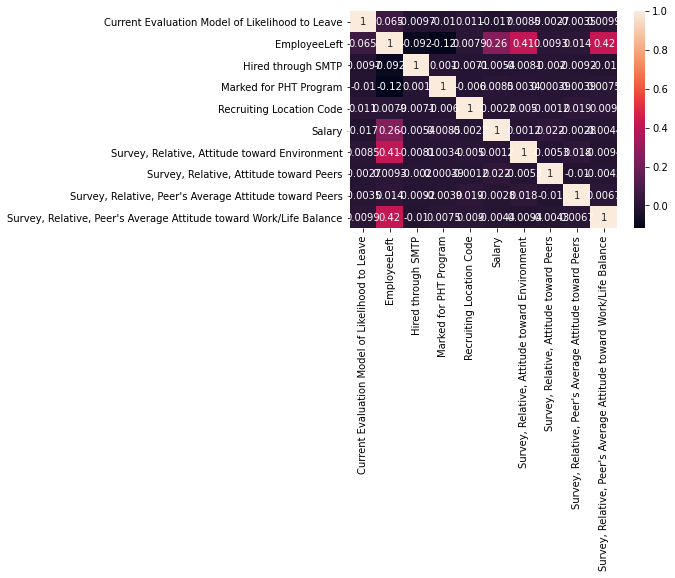

In [364]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [365]:
# covarience
# Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

In [366]:
covMatrix = df.cov()

In [367]:
print(covMatrix)

                                                    Current Evaluation Model of Likelihood to Leave  \
Current Evaluation Model of Likelihood to Leave                                          110.736878   
EmployeeLeft                                                                               0.338766   
Hired through SMTP                                                                        -0.050916   
Marked for PHT Program                                                                    -0.053574   
Recruiting Location Code                                                                2908.384348   
Salary                                                                                 -1046.167815   
Survey, Relative, Attitude toward Environment                                              0.114613   
Survey, Relative, Attitude toward Peers                                                   -0.054286   
Survey, Relative, Peer's Average Attitude towar...                       

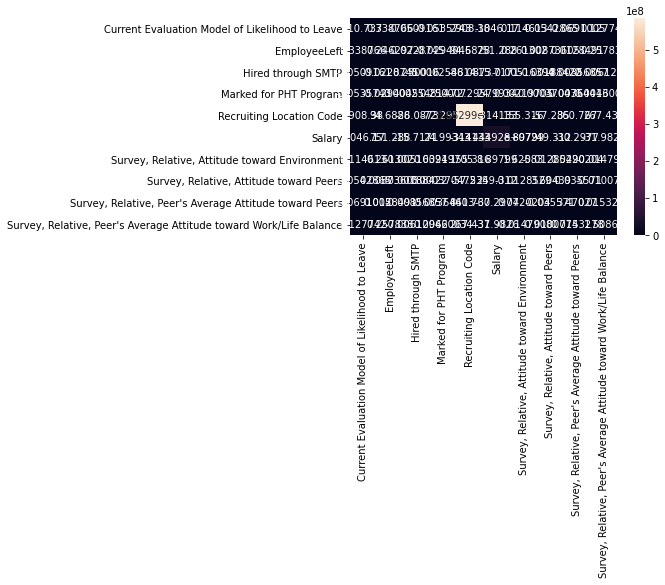

In [368]:
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [369]:
import scipy.stats

In [370]:
# lets run some stats and spearman correlation to to see how each features correlates.

In [371]:
scipy.stats.rankdata(df["EmployeeLeft"])

array([10927.5, 10927.5,  3927.5, ..., 10927.5, 10927.5,  3927.5])

In [372]:
rho, p = scipy.stats.spearmanr(df["EmployeeLeft"], df["EmployeeLeft"])

In [373]:
rho

1.0

In [374]:
p

0.0

In [375]:
result = scipy.stats.spearmanr(df["Salary"], df["EmployeeLeft"])

In [376]:
result.correlation

0.24355218666560144

In [377]:
result = scipy.stats.spearmanr(df["Survey, Relative, Peer's Average Attitude toward Work/Life Balance"], df["EmployeeLeft"])

In [378]:
result.correlation

0.42390091164361576

In [379]:
result = scipy.stats.spearmanr(df["Survey, Relative, Peer's Average Attitude toward Peers"], df["EmployeeLeft"])

In [380]:
result.correlation

0.014504028151082862

In [381]:
result = scipy.stats.spearmanr(df["Survey, Relative, Peer's Average Attitude toward Peers"], df["Survey, Relative, Peer's Average Attitude toward Work/Life Balance"])

In [382]:
result.correlation

0.007172035830673635

In [383]:
# create slope to see if features are correleated to get better model performance.

In [384]:
slope, intercept, r, p, stderr = scipy.stats.linregress(df["Salary"], df["EmployeeLeft"])

In [385]:
p

1.4805867423151943e-211

In [386]:
# convert the text column to numeric using oneHotEncoding.

In [387]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [388]:
import sklearn as sk

In [389]:
df['University'] = df['University'].astype('category')
#df['Email Domain'] = df['Email Domain'].astype('category')
df = pd.get_dummies(df)

In [390]:
# split the features and label into X and y array

In [391]:
y = df.iloc[:,1]
X = df.iloc[:,:15]

In [392]:
A=df.iloc[:,1]

In [393]:
#drop the label column from features
X = X.drop(columns=['EmployeeLeft'])

In [394]:
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: EmployeeLeft, dtype: float64

In [395]:
y.describe()

count    14000.000000
mean         0.439000
std          0.496283
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: EmployeeLeft, dtype: float64

In [396]:
y.median()

0.0

In [397]:
y.mean()

0.439

In [398]:
y.count()

14000

In [399]:
y.value_counts()

0.0    7854
1.0    6146
Name: EmployeeLeft, dtype: int64

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [444]:
# Run through various model.

In [445]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression

In [446]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)
LR.predict(X.iloc[460:,:])
round(LR.score(X,y), 4)

0.5484

In [447]:
y_pred = LR.predict(X_test)

In [448]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [449]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.90      0.69      2558
         1.0       0.44      0.09      0.15      2062

    accuracy                           0.54      4620
   macro avg       0.50      0.50      0.42      4620
weighted avg       0.50      0.54      0.45      4620



In [450]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.4985663356966107
f1 score:  0.15495207667731628


In [420]:
from sklearn import svm

In [421]:
SVM = svm.SVC()
SVM.fit(X, y)
SVM.predict(X.iloc[460:,:])
round(SVM.score(X,y), 4)

0.6148

In [422]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
RF.fit(X, y)
RF.predict(X.iloc[460:,:])
round(RF.score(X,y), 4)

0.9334

In [425]:
y_pred = RF.predict(X_test)

In [426]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2558
         1.0       0.94      0.91      0.92      2062

    accuracy                           0.93      4620
   macro avg       0.93      0.93      0.93      4620
weighted avg       0.93      0.93      0.93      4620



In [428]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.9283296768131626
f1 score:  0.9211045364891518


In [429]:
from sklearn.neighbors import KNeighborsClassifier

In [430]:
reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)

In [431]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63      2558
         1.0       0.52      0.45      0.48      2062

    accuracy                           0.57      4620
   macro avg       0.56      0.56      0.56      4620
weighted avg       0.56      0.57      0.56      4620



In [434]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.5559864679683524
f1 score:  0.4826694257630626


In [435]:
SVM = svm.SVC()
model = SVM.fit(X, y)
SVM.predict(X.iloc[460:,:])
round(SVM.score(X,y), 4)

0.6148

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
import lightgbm as lgb

In [183]:
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']

In [184]:
x, x_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [185]:
train_data = lgb.Dataset(x, label=y)
test_data = lgb.Dataset(x_test, label=y_test)

In [186]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [ ]:
model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

In [188]:
y1 = model.predict(x)

In [189]:
y1

array([0.2500882 , 0.08493501, 0.89322571, ..., 0.85171135, 0.06155592,
       0.78727831])

In [453]:
RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
model = RF.fit(X, y)
y_pred = RF.predict(X_test)
round(RF.score(X,y), 4)

0.9881

In [454]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2558
         1.0       0.99      0.99      0.99      2062

    accuracy                           0.99      4620
   macro avg       0.99      0.99      0.99      4620
weighted avg       0.99      0.99      0.99      4620



In [455]:
print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.9880343442417201
f1 score:  0.9868868382710054


In [288]:
import warnings
warnings.filterwarnings('ignore')

In [289]:
# model Explainability

In [290]:
from interpret.ext.blackbox import TabularExplainer

In [291]:
# "features" and "classes" fields are optional
explainer = TabularExplainer(model, 
                             X_train)

In [292]:
explainer

In [293]:
# you can use the training data or the test data here, but test data would allow you to use Explanation Exploration
global_explanation = explainer.explain_global(X_test)

# if you used the PFIExplainer in the previous step, use the next line of code instead
# global_explanation = explainer.explain_global(x_train, true_labels=y_train)

# sorted feature importance values and feature names
sorted_global_importance_values = global_explanation.get_ranked_global_values()
sorted_global_importance_names = global_explanation.get_ranked_global_names()
dict(zip(sorted_global_importance_names, sorted_global_importance_values))

# alternatively, you can print out a dictionary that holds the top K feature names and values
global_explanation.get_feature_importance_dict()

{"Survey, Relative, Peer's Average Attitude toward Work/Life Balance": 0.1843198183453209,
 'Survey, Relative, Attitude toward Environment': 0.13602505436826304,
 'University_St. Norbert College': 0.1147910152564349,
 'Salary': 0.10150915532537727,
 'Marked for PHT Program': 0.053215837610919116,
 'University_Enugu State University of Science and Technology': 0.039354639799536933,
 'Hired through SMTP': 0.026239663461093347,
 'Current Evaluation Model of Likelihood to Leave': 0.01873683081390949,
 'Recruiting Location Code': 0.011368989842327992,
 "Survey, Relative, Peer's Average Attitude toward Peers": 0.010908925874145008,
 'Survey, Relative, Attitude toward Peers': 0.010139407686566682,
 'University_NHTV Breda University of Professional Education': 0.009716061251159893,
 'University_COMSATS Institute of Information Technology': 0.002622934997853491,
 'University_Nazarene Bible College': 0.002550784281561233}

In [294]:
# https://towardsdatascience.com/building-classification-models-with-sklearn-6a8fd107f0c1

In [295]:
from interpret_community.widget import ExplanationDashboard

ExplanationDashboard(global_explanation, model, datasetX=X_test)

In [296]:
#https://docs.microsoft.com/en-us/azure/machine-learning/how-to-machine-learning-interpretability-aml#interpretability-at-inference-time

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
sensitive_features_train = X
sensitive_features_test = y

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [301]:
#roc_auc_score(Y_train, model.predict_proba(y_test)[:, 1])

In [302]:
from fairlearn.widget import FairlearnDashboard
from sklearn.model_selection import train_test_split
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity, ErrorRate

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [303]:
unmitigated_predictor = LogisticRegression(solver='liblinear', fit_intercept=True)

unmitigated_predictor.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [305]:
predictions = unmitigated_predictor.predict(X)

In [306]:
# Use score method to get accuracy of model
score = unmitigated_predictor.score(X, y)
print(score)

0.7356428571428572


In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [308]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[6171 1683]
 [2018 4128]]


In [309]:
import sklearn.metrics as skm

In [310]:
X_test

Current Evaluation Model of Likelihood to Leave  Hired through SMTP  \
2900                                              27.3                   0   
3143                                              19.9                   1   
8231                                              43.2                   0   
3855                                              47.4                   0   
8045                                              20.0                   1   
...                                                ...                 ...   
2847                                              31.7                   1   
7281                                              28.8                   0   
12894                                             17.6                   1   
10067                                             29.8                   1   
6105                                              44.2                   0   

       Marked for PHT Program  Recruiting Location Code    Salary  \
2900                        0                     27999  44826.72   
3143                        0                     27999  42610.99   
8231                        0                     63997  55986.76   
3855                        1                     27999  41542.02   
8045                        0                     27999  44819.56   
...                       ...                       ...       ...   
2847                        1                     63997  64484.79   
7281                        0                     81996  43362.72   
12894                       1                     27999  62804.63   
10067                       1                     63997  46281.10   
6105                        1                     45998  49869.40   

       Survey, Relative, Attitude toward Environment  \
2900                                               5   
3143                                               4   
8231                                               5   
3855                                               4   
8045                                               4   
...                                              ...   
2847                                               2   
7281                                               3   
12894                                              3   
10067                                              2   
6105                                               2   

       Survey, Relative, Attitude toward Peers  \
2900                                         1   
3143                                         3   
8231                                         4   
3855                                         4   
8045                                         3   
...                                        ...   
2847                                         5   
7281                                         2   
12894                                        4   
10067                                        5   
6105                                         2   

       Survey, Relative, Peer's Average Attitude toward Peers  \
2900                                                   6        
3143                                                   6        
8231                                                   2        
3855                                                   2        
8045                                                   2        
...                                                  ...        
2847                                                   1        
7281                                                   2        
12894                                                  2        
10067                                                  4        
6105                                                   2        

       Survey, Relative, Peer's Average Attitude toward Work/Life Balance  \
2900                                                   4                    
3143                            

In [ ]:
skm.recall_score(X_test, y_test)

In [312]:
sensitivefeaturesX = X_test.columns.tolist()

In [313]:
sensitivefeaturesX = X_test['Salary']

In [314]:
# model Fairness assesment

In [346]:
FairlearnDashboard(sensitive_features=sensitivefeaturesX, sensitive_feature_names=['Salary'],
                   y_true=y_test.tolist(),
                   y_pred={"unmitigated": RF.predict(X_test)})

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 15 

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [342]:
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity, ErrorRate

from sklearn import svm, neighbors, tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import shap

import numpy as np

shap.initjs()

In [319]:
y = df.iloc[:,1]
X = df.iloc[:,:15]

In [320]:
A = df["EmployeeLeft"]
X = df.drop(labels=['EmployeeLeft'],axis = 1)
X = pd.get_dummies(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

le = LabelEncoder()
Y = le.fit_transform(y)

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, A_train, A_test = train_test_split(X_scaled, 
                                                    Y, 
                                                    A,
                                                    test_size = 0.2,
                                                    random_state=0,
                                                    stratify=Y)

# Work around indexing bug
X_train = X_train.reset_index(drop=True)
A_train = A_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

# Improve labels
A_test = A_test.map({ 0:"false", 1:"true"})

In [322]:
unmitigated_predictor = LogisticRegression(solver='liblinear', fit_intercept=True)

unmitigated_predictor.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
unmitigated_predictor.coef_

array([[ 0.28657174, -0.40892133, -0.60962457, -0.01975343,  1.28463111,
         2.04242416,  0.05606535,  0.0040691 ,  1.97127011, -0.30125117,
         0.25015358, -0.07659075, -0.3832521 ,  0.67997448, -0.78493023]])

In [325]:
first_sweep=GridSearch(LogisticRegression(solver='liblinear', fit_intercept=True),
                       constraints=DemographicParity(),
                       grid_size=7)

first_sweep.fit(X, Y, sensitive_features=A)

In [326]:
lambda_vecs = first_sweep._lambda_vecs
lambda_vecs[0]

sign  event  group_id
+     all    0.0         0.0
             1.0         0.0
-     all    0.0         0.0
             1.0         2.0
Name: 0, dtype: float64

In [327]:
from fairlearn.widget import FairlearnDashboard
FairlearnDashboard(sensitive_features=A_test, sensitive_feature_names=['EmployeeLeft'],
                   y_true=Y_test,
                   y_pred={"unmitigated": unmitigated_predictor.predict(X_test)})

FairlearnWidget(value={'true_y': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0…

In [328]:
sweep = GridSearch(LogisticRegression(solver='liblinear', fit_intercept=True),
                   constraints=DemographicParity(),
                   grid_size=71)

In [329]:
sweep.fit(X_train, Y_train,
          sensitive_features=A_train)

predictors = sweep._predictors

In [330]:
errors, disparities = [], []
for m in predictors:
    classifier = lambda X: m.predict(X)
    
    error = ErrorRate()
    error.load_data(X_train, pd.Series(Y_train), sensitive_features=A_train)
    disparity = DemographicParity()
    disparity.load_data(X_train, pd.Series(Y_train), sensitive_features=A_train)
    
    errors.append(error.gamma(classifier)[0])
    disparities.append(disparity.gamma(classifier).max())
    
all_results = pd.DataFrame( {"predictor": predictors, "error": errors, "disparity": disparities})

non_dominated = []
for row in all_results.itertuples():
    errors_for_lower_or_eq_disparity = all_results["error"][all_results["disparity"]<=row.disparity]
    if row.error <= errors_for_lower_or_eq_disparity.min():
        non_dominated.append(row.predictor)

In [331]:
all_results

predictor     error  disparity
0   LogisticRegression(C=1.0, class_weight=None, d...  0.892321   0.445664
1   LogisticRegression(C=1.0, class_weight=None, d...  0.890625   0.443992
2   LogisticRegression(C=1.0, class_weight=None, d...  0.887679   0.441095
3   LogisticRegression(C=1.0, class_weight=None, d...  0.884464   0.437881
4   LogisticRegression(C=1.0, class_weight=None, d...  0.881339   0.434905
..                                                ...       ...        ...
66  LogisticRegression(C=1.0, class_weight=None, d...  0.067768   0.484954
67  LogisticRegression(C=1.0, class_weight=None, d...  0.068036   0.484686
68  LogisticRegression(C=1.0, class_weight=None, d...  0.068214   0.484508
69  LogisticRegression(C=1.0, class_weight=None, d...  0.068304   0.484419
70  LogisticRegression(C=1.0, class_weight=None, d...  0.068393   0.484329

[71 rows x 3 columns]

In [332]:
dashboard_predicted = {"unmitigated": unmitigated_predictor.predict(X_test)}
for i in range(len(non_dominated)):
    key = "dominant_model_{0}".format(i)
    value = non_dominated[i].predict(X_test)
    dashboard_predicted[key] = value


FairlearnDashboard(sensitive_features=A_test, sensitive_feature_names=['EmployeeLeft'],
                   y_true=Y_test,
                   y_pred=dashboard_predicted)

FairlearnWidget(value={'true_y': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0…

In [338]:
X_test

Current Evaluation Model of Likelihood to Leave  Hired through SMTP  \
0                                           -0.597158           -0.997147   
1                                           -0.720699           -0.997147   
2                                           -1.604496            1.002861   
3                                           -0.834738            1.002861   
4                                           -0.492623           -0.997147   
...                                               ...                 ...   
2795                                        -1.243375           -0.997147   
2796                                        -0.872750            1.002861   
2797                                        -0.540139            1.002861   
2798                                         0.457696           -0.997147   
2799                                        -3.048981           -0.997147   

      Marked for PHT Program  Recruiting Location Code    Salary  \
0                   0.993308                  1.206328  0.483966   
1                   0.993308                  1.206328 -0.547015   
2                  -1.006737                 -0.280409 -0.549789   
3                  -1.006737                  1.206328 -0.231268   
4                   0.993308                 -0.280409  0.133176   
...                      ...                       ...       ...   
2795                0.993308                 -1.023778 -0.495544   
2796               -1.006737                 -1.023778 -0.565350   
2797               -1.006737                  0.462959  0.454793   
2798               -1.006737                  1.206328  0.693905   
2799               -1.006737                  0.462959  0.597788   

      Survey, Relative, Attitude toward Environment  \
0                                          0.972131   
1                                         -0.596455   
2                                         -0.596455   
3                                         -1.380748   
4                                          0.972131   
...                                             ...   
2795                                       0.187838   
2796                                      -0.596455   
2797                                      -0.596455   
2798                                      -0.596455   
2799                                      -0.596455   

      Survey, Relative, Attitude toward Peers  \
0                                    0.484003   
1                                   -0.042742   
2                                   -0.042742   
3                                   -0.569486   
4                                   -1.096230   
...                                       ...   
2795                                 2.064235   
2796                                 1.010747   
2797                                 1.010747   
2798                                 1.010747   
2799                                 1.010747   

      Survey, Relative, Peer's Average Attitude toward Peers  \
0                                              0.159744        
1                                              1.770223        
2                                             -0.377082        
3                                              0.696571        
4                                             -0.913909        
...                                                 ...        
2795                                           0.696571        
2796                                          -0.913909        
2797                                           0.696571        
2798                                          -0.913909        
2799                                          -0.377082        

      Survey, Relative, Peer's Average Attitude toward Work/Life Balance  \
0                                             -1.188369                    
1                                             -0.374179                    
2                